# Task 2: Baseline Models for Breast Cancer Detection

This notebook implements baseline models (SVM and MLP) for the **Wisconsin Diagnostic Breast Cancer (WDBC)** dataset using the processed data from Task 1.
Steps include:
- Loading processed data
- Train/test split
- Implementing SVM and MLP models
- Evaluating performance with accuracy, confusion matrix, classification report, and ROC curve


## 1. Load Processed Data

In [8]:
import numpy as np
import pandas as pd

# Load processed data
X_scaled = np.load('X_scaled.npy')
y = np.load('y.npy')

print('Features shape:', X_scaled.shape)
print('Labels shape:', y.shape)

Features shape: (569, 30)
Labels shape: (569,)


## 2. Train/Test Split

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, stratify=y, random_state=42)
print('Train shape:', X_train.shape, 'Test shape:', X_test.shape)

Train shape: (398, 30) Test shape: (171, 30)


## 3. Implement SVM Model

SVM Accuracy: 0.9649122807017544
Classification Report:               precision    recall  f1-score   support

           0       0.95      1.00      0.97       107
           1       1.00      0.91      0.95        64

    accuracy                           0.96       171
   macro avg       0.97      0.95      0.96       171
weighted avg       0.97      0.96      0.96       171



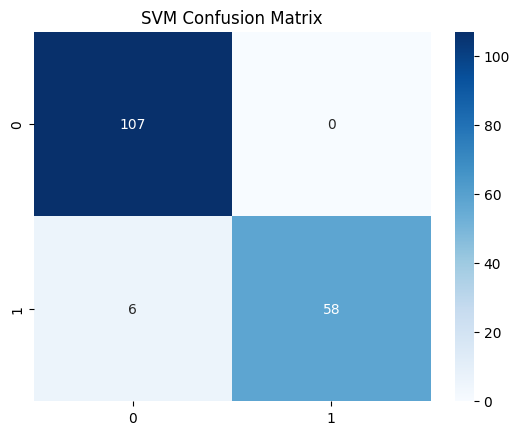

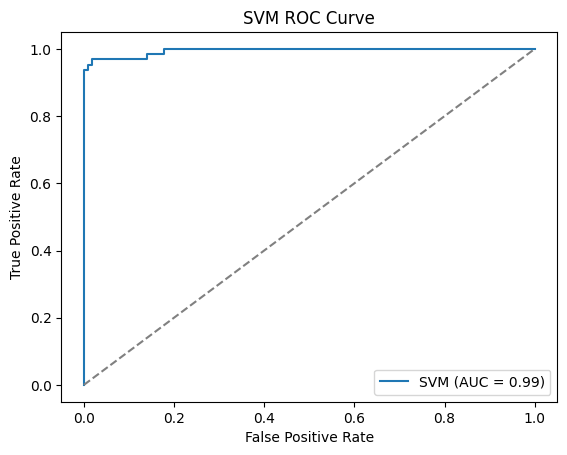

In [10]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Train SVM
svm_model = SVC(kernel='linear', probability=True, random_state=42)
svm_model.fit(X_train, y_train)

# Predictions
y_pred_svm = svm_model.predict(X_test)

# Evaluation
print('SVM Accuracy:', accuracy_score(y_test, y_pred_svm))
print('Classification Report:', classification_report(y_test, y_pred_svm))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_svm)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('SVM Confusion Matrix')
plt.show()

# ROC Curve
y_prob_svm = svm_model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, y_prob_svm)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'SVM (AUC = {roc_auc:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend()
plt.show()

## 4. Implement MLP Model

MLP Accuracy: 0.9590643274853801
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.98      0.97       107
           1       0.97      0.92      0.94        64

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



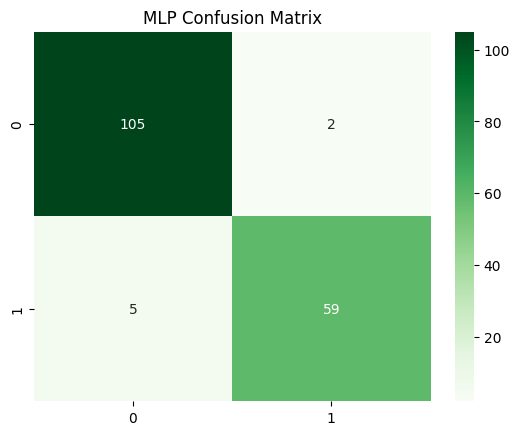

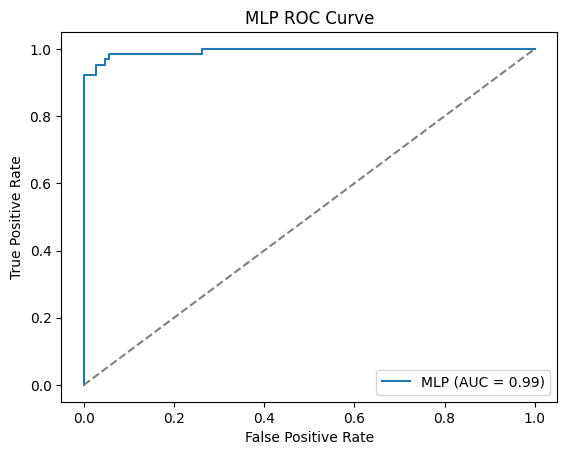

In [11]:
from sklearn.neural_network import MLPClassifier

# Define MLP architecture (similar to paper: 3 hidden layers, ReLU activation)
mlp_model = MLPClassifier(hidden_layer_sizes=(500,500,500), activation='relu', solver='adam', max_iter=300, random_state=42)
mlp_model.fit(X_train, y_train)

# Predictions
y_pred_mlp = mlp_model.predict(X_test)

# Evaluation
print('MLP Accuracy:', accuracy_score(y_test, y_pred_mlp))
print('Classification Report:', classification_report(y_test, y_pred_mlp))

# Confusion Matrix
cm_mlp = confusion_matrix(y_test, y_pred_mlp)
sns.heatmap(cm_mlp, annot=True, fmt='d', cmap='Greens')
plt.title('MLP Confusion Matrix')
plt.show()

# ROC Curve
y_prob_mlp = mlp_model.predict_proba(X_test)[:,1]
fpr_mlp, tpr_mlp, _ = roc_curve(y_test, y_prob_mlp)
roc_auc_mlp = auc(fpr_mlp, tpr_mlp)
plt.plot(fpr_mlp, tpr_mlp, label=f'MLP (AUC = {roc_auc_mlp:.2f})')
plt.plot([0,1],[0,1],'--',color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('MLP ROC Curve')
plt.legend()
plt.show()

## 5. Optional: Save Trained Models

In [12]:
import joblib
joblib.dump(svm_model, 'svm_model.pkl')
joblib.dump(mlp_model, 'mlp_model.pkl')
print('Models saved: svm_model.pkl, mlp_model.pkl')

Models saved: svm_model.pkl, mlp_model.pkl
